<center>
    <img src="https://i.ibb.co/wQg0qzq/Banner.png" width="900" alt="KCode Banner"  />
</center>
<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>




# Algoritmo de regressão linear simples

Vamos utilizar um conjunto de dados referente à emissão de CO2 por automóveis
# Objetivo:
* Utilizar a bilioteca scikit-learn para implantar um modelo de regressão linear simples;
* Criar um modelo, treina-lo, testa-lo e utilizar.

### Importando bibliotecas necessárias

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import requests as rq
%matplotlib inline

### Criando o DataFrame

In [51]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.drop(columns=['FUELCONSUMPTION_COMB_MPG'], inplace=True) # Excluindo coluna redundante
df.head() # Dando uma olhada no DataFrame



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


## Entendendo os dados

### `FuelConsumptionCo2.csv`:


Fizemos o download de um conjunto de dados, **`FuelConsuptionCo2.csv`**, de consumo de combustível, que contém consumo de combustível de modelos específicos e taxas estimadas de emissão de dioxido de carbono, para veículos leves novos à venda varejo no Canadá. [Fonte](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


*   **MODELYEAR** e.g. 2014 - **Ano do Modelo**
*   **MAKE** e.g. Acura - **Fabricante**
*   **MODEL** e.g. ILX - **Modelo**
*   **VEHICLE CLASS** e.g. SUV - **Classe do veículo**
*   **ENGINE SIZE** e.g. 4.7 - **Tamanho do motor**
*   **CYLINDERS** e.g 6 - **Número de cilindros**
*   **TRANSMISSION** e.g. A6 - Transmissão
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9 - **Consumo de combústivel L/100km na cidade**
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9 - **Consumo de combústivel L/100km na BR**
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2 - **Consumo de combústivel L/100km Combinado**
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low -->  - **Emissão de Co2** 

### Verificando o tamanho do nosso conjunto de dados
usando a o metódo **.shape** que vai retornar as linhas e colunas

In [52]:
df.shape

(1067, 12)

### Para melhor compreensão, vamos agora traduzir os títulos das colunas(headers), para o português

In [53]:
df.columns=['Ano', 'Fabricante', 'Modelo', 'Tipo', 'Tamanho_motor', 'Cilindros',
'Transmissao', 'Combustivel', 'Consumo_cid', 'Consumo_br', 'Consumo_combo','EmissaoCO2']
df.head(3)

,Ano,Fabricante,Modelo,Tipo,Tamanho_motor,Cilindros,Transmissao,Combustivel,Consumo_cid,Consumo_br,Consumo_combo,EmissaoCO2
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136


### Explorando os dados
Verificando se existem entradas nulas com a função **info()** entradas nulas impossibilitariam 
o treino do nosso algorítmo de aprendizado de máquina posteriormente
vamos ver também o tamanho do nosso conjunto de dados com este comando:

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ano            1067 non-null   int64  
 1   Fabricante     1067 non-null   object 
 2   Modelo         1067 non-null   object 
 3   Tipo           1067 non-null   object 
 4   Tamanho_motor  1067 non-null   float64
 5   Cilindros      1067 non-null   int64  
 6   Transmissao    1067 non-null   object 
 7   Combustivel    1067 non-null   object 
 8   Consumo_cid    1067 non-null   float64
 9   Consumo_br     1067 non-null   float64
 10  Consumo_combo  1067 non-null   float64
 11  EmissaoCO2     1067 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 100.2+ KB


Não existem entradas núlas, está tudo ok e
o DataFrame tem 1067 entradas.

### Vamos separar algumas caractéristicas para aprofundar:

In [55]:
cdf = df[['Tamanho_motor', 'Cilindros', 'Consumo_combo', 'EmissaoCO2']]
cdf.head(10)

,Tamanho_motor,Cilindros,Consumo_combo,EmissaoCO2
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


Vamos plotar um gráfico com cada uma dessas características:

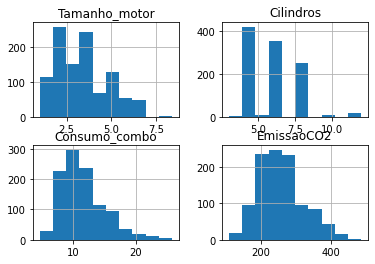

In [56]:
viz = cdf[['Tamanho_motor', 'Cilindros', 'Consumo_combo', 'EmissaoCO2']]
viz.hist()
plt.show()

Agora vamos plotar gráficos relacionando as características acima com a emissão de CO2:

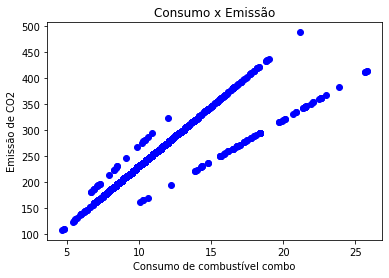

In [57]:
plt.scatter(cdf.Consumo_combo, cdf.EmissaoCO2,  color='blue')
plt.xlabel("Consumo de combustível combo")
plt.ylabel("Emissão de CO2")
plt.title("Consumo x Emissão")
plt.show()

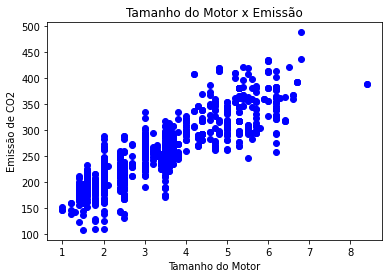

In [58]:
plt.scatter(cdf.Tamanho_motor, cdf.EmissaoCO2,  color='blue')
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissão de CO2")
plt.title("Tamanho do Motor x Emissão")
plt.show()



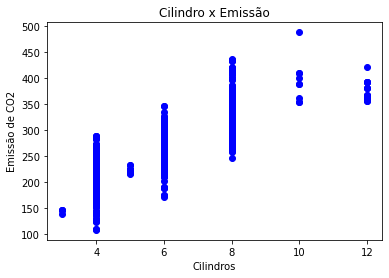

In [59]:
viz = cdf[['Tamanho_motor', 'Cilindros', 'Consumo_combo', 'EmissaoCO2']]

plt.scatter(cdf.Cilindros, cdf.EmissaoCO2,  color='blue')
plt.xlabel("Cilindros")
plt.ylabel("Emissão de CO2")
plt.title("Cilindro x Emissão")
plt.show()

#### Criando um conjunto de dados de treino e teste


A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de teste.
Isso fornecerá uma avaliação mais precisa da precisão fora da amostra porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar o modelo. Portanto, isso nos dá uma melhor compreensão de quão bem nosso modelo generaliza em novos dados.

Isso significa que sabemos o resultado de cada ponto de dados no conjunto de dados de teste, tornando-o ótimo para testar! Como esses dados não foram usados ​​para treinar o modelo, o modelo não tem conhecimento do resultado desses pontos de dados. Então, em essência, é realmente um teste fora da amostra.

Vamos dividir nosso conjunto de dados em conjuntos de treinamento e teste. 80% de todo o conjunto de dados será usado para treinamento e 20% para teste. Criamos uma máscara para selecionar linhas aleatórias usando a função **np.random.rand()**:

In [68]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Modelo de regressão simples

A Regressão Linear ajusta um modelo linear com coeficientes B = (B1, ..., Bn) para minimizar a 'soma dos quadrados residual' entre o valor real  no conjunto de dados e o valor previsto usando aproximação linear.

#### Destribuição do treino de dados:

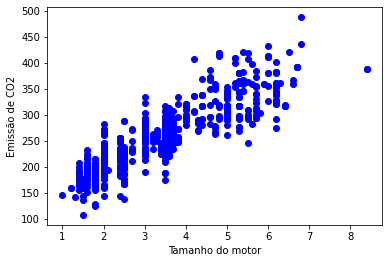

In [61]:
plt.scatter(train.Tamanho_motor, train.EmissaoCO2,  color='blue')
plt.xlabel("Tamanho do motor")
plt.ylabel("Emissão de CO2")
plt.show()

#### Modelando

Usando a biblioteca sklearn para modelar os dados:

In [69]:
from sklearn import linear_model
regr = linear_model.LinearRegression() # Modelo de regressão linear simples
train_x = np.asanyarray(train[['Tamanho_motor']])
train_y = np.asanyarray(train[['EmissaoCO2']])
regr.fit(train_x, train_y)
# Gradiente angular
print ('Gradiente Angular: ', regr.coef_)
print ('Intersecção: ',regr.intercept_)


Gradiente Angular:  [[40.01626532]]
Intersecção:  [122.44162416]


 **Gradiente Angular** e **Interceptação** na regressão linear simples, são os parâmetros de ajuste da hipótese(linha).
Dado que se trata de uma regressão linear simples, com apenas 2 parâmetros, e sabendo que os parâmetros são o Intersecção e a Gradiente angular(inclinação da linha), o sklearn pode estimá-los diretamente a partir de nossos dados.

#### Plotando saídas


E abaixo teremos nossa hipótese de emissão de CO2 x tamanho do motor:

Text(0, 0.5, 'Emissão de CO2')

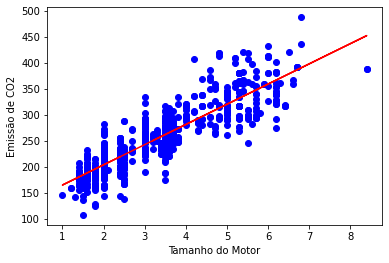

In [63]:
plt.scatter(train.Tamanho_motor, train.EmissaoCO2,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissão de CO2")

#### Avaliação de precisão da nossa hipótese

Comparamos os valores reais e os valores previstos para calcular a precisão de um modelo de regressão. As métricas de avaliação desempenham um papel fundamental no desenvolvimento de um modelo, pois fornecem insights para áreas que precisam ser aprimoradas.

Existem diferentes métricas de avaliação do modelo, vamos usar o **MSE(EMA)** aqui para calcular a precisão do nosso modelo com base no conjunto de teste:

* **Erro Médio Absoluto**: É a média do valor absoluto dos erros. Essa é a métrica mais fácil de entender, pois é apenas um erro médio.

* **Erro quadrático médio (MSE)**: Erro quadrático médio (MSE) é a média do erro quadrático. É mais popular que o erro médio absoluto porque o foco é mais voltado para erros grandes. Isso se deve ao fato de o termo quadrado aumentar exponencialmente os erros maiores em comparação com os menores.

* **Erro quadrático médio da raiz (RMSE)**.

* **R²** não é um erro, mas sim uma métrica popular para medir o desempenho do seu modelo de regressão. Ele representa o quão perto os pontos de dados estão da linha de regressão ajustada. Quanto maior o valor do R-quadrado, melhor o modelo se ajusta aos seus dados. A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).

In [70]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Tamanho_motor']])
test_y = np.asanyarray(test[['EmissaoCO2']])
test_y_ = regr.predict(test_x)


def top(): # Função para fazer uma margem
    print(55*'-')

top()
print('Avaliação de erro em relação ao tamanho do motor')
top()
print(f"Média de erro absoluta(MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Residual da soma dos quadrados(MSE): {np.mean((test_y_ - test_y) ** 2):.2f} ")
print(f"R²: {r2_score(test_y , test_y_):.2f}")
top()

-------------------------------------------------------
Avaliação de erro em relação ao tamanho do motor
-------------------------------------------------------
Média de erro absoluta: 22.87
Residual da soma dos quadrados(MSE): 925.91 
R²: 0.72
-------------------------------------------------------


## Agora vamos avaliar o erro utilizando como parâmetro para o treino o consumo do motor

In [73]:
train_x = train[['Consumo_combo']]
test_x = test[['Consumo_combo']]

Agora vamos treinar o modelo de Regressão usando o `train_x` que criamos agora e o `train_y` que criamos anteriormente

In [75]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)


LinearRegression()

Encontrando as predições usando o a função `predict` e os dados do `text_x`


In [76]:
predictions = regr.predict(test_x)

Por último vamos usar as `predictions` e os dados do `test_y` para encontrar o valor da média de erro absoluto (MAE) usando as funções `np.absolute` e `np.mean` como fizemos antes

In [79]:
print(f"Média de erro absoluto(MAE): {np.mean(np.absolute(predictions - test_y)):.2f}")

Média de erro absoluto(MAE): 17.38


Como podemos ver, a méda de erro absoluto(MAE) ficou muito pior(maior) quando treinamos usaando o `Tamanho_motor` do que quando usamos o `Consumo_combo`